In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
x_train.shape
#has no color channel

(60000, 28, 28)

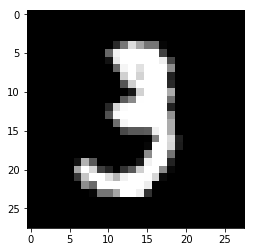

In [12]:
#grab single image
single = x_train[10]
plt.imshow(single, cmap='gray')

In [13]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

So if you feed this way the nn get confused(i.e, might think its a continuous data not category so we have to convert this to category)

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
y_cat_test = to_categorical(y_test,10) #no of class = 10
y_cat_train = to_categorical(y_train,10)

In [17]:
y_cat_test[0] #one hot encoded

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [18]:
single.max() #still very high we have to normalize

254

In [19]:
#manually
x_train = x_train/x_train.max()

In [20]:
#manually
x_test = x_test/x_test.max()

In [22]:
x_test[0].max()

1.0

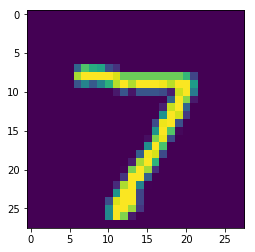

In [23]:
plt.imshow(x_test[0])

In [25]:
x_test.shape, x_train.shape

((10000, 28, 28), (60000, 28, 28))

In [26]:
#include color channel now it has only 1
x_train = x_train.reshape(60000,28,28,1)

In [27]:
x_train.shape

(60000, 28, 28, 1)

In [28]:
x_test = x_test.reshape(10000,28,28,1)

In [29]:
x_test.shape

(10000, 28, 28, 1)

Now data is preprocessed

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D,Flatten 

In [34]:
model = Sequential()
#CONV Layer
model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#above 2 layers can understand 2d array
#but dense layer only knows 1d so we need to flatten out
model.add(Flatten())
#dense
model.add(Dense(128,activation='relu')) #no of neurons can choose any 128,64,256 etc
model.add(Dense(10,activation='softmax')) #no of o/p
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [41]:
history = model.fit(x_train, y_cat_train, nb_epoch=2, validation_split=0.2, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
   96/48000 [..............................] - ETA: 1:05 - loss: 0.0128 - acc: 1.0000

C:\Users\codehax41\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


48000/48000 [==============================] - 59s 1ms/step - loss: 0.0351 - acc: 0.9895 - val_loss: 0.0362 - val_acc: 0.9895
Epoch 2/2
48000/48000 [==============================] - 60s 1ms/step - loss: 0.0257 - acc: 0.9924 - val_loss: 0.0309 - val_acc: 0.9902


In [42]:
model.metrics_names

['loss', 'acc']

In [43]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 3s 319us/step


[0.043838072220422325, 0.9869]

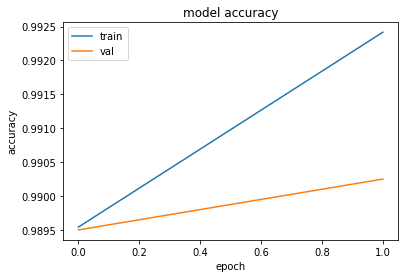

In [44]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [45]:
from sklearn.metrics import classification_report

In [46]:
predictions = model.predict_classes(x_test)

In [47]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.97      0.99      0.98       892
           6       0.99      0.97      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.97      0.99      0.98       974
           9       0.99      0.97      0.98      1009

   micro avg       0.99      0.99      0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

